# Euclidian distance

I don't really belive that there isn't a function within numpy that doesn't do this but I can't find it through googling

In [1]:
import numpy as np


In [4]:
A = np.array([[2, 3, 4], [4, 5, 6]])
B = np.array([[6, 7, 8], [8, 9, 0]])
A

array([[2, 3, 4],
       [4, 5, 6]])

In [4]:
B

array([[6, 7, 8],
       [8, 9, 0]])

In [6]:
dist_1 = np.sqrt(32)
dist_3 = np.sqrt(20)

In [9]:
C = B - A 

In [10]:
C^2

array([[ 6,  6,  6],
       [ 6,  6, -8]])

In [14]:
C_2 = C**2

In [16]:
ident = np.array([1, 1])
ident

array([1, 1])

In [19]:
np.matmul(C_2.T, ident) ** .5

array([5.65685425, 5.65685425, 7.21110255])

In [20]:
dist_1

5.656854249492381

In [21]:
dist_3

4.47213595499958

In [9]:
def euclidian_dist(A, B):
    """
    Helper function which calculates the euclidian distance between all x, y points in a matrix
    
    runs in O(log n) time 
    
    Input:
    -------
    A, B np.arrays of dimension [2, n]
    """
    C = np.subtract(B, A)
    C_2 = np.square(C)
    dist_2 = np.matmul(C_2.T, np.array([1, 1]))
    return np.sqrt(dist_2)

In [10]:
euclidian_dist(A, B)

array([0.5094668 , 0.69092365, 0.82645307, ..., 0.56088298, 0.67597851,
       0.65024185])

In [7]:
A = np.random.rand(2,3600000)
B = np.random.rand(2, 3600000)

In [16]:
A

array([[0.25981228, 0.92328691, 0.70658252, ..., 0.65953016, 0.63319065,
        0.60597913],
       [0.54344872, 0.83300055, 0.97189666, ..., 0.78626834, 0.52887679,
        0.59620875]])

In [20]:
""" some benchmarking to find out the speed """
import time
x1 = 10000
x2 = 1000000
A = np.random.rand(2, x1)
B = np.random.rand(2, x1)
start2 = time.time()
euclidian_dist(A, B)
end2 = time.time()
A = np.random.rand(2, x2)
B = np.random.rand(2, x2)
start5 = time.time()
euclidian_dist(A, B)
end5 = time.time()
time1 = end2 - start2
time2 = end5 - start5
print(f'time1: {time1}, time2: {time2}')
print(f'difference {time2-time1}, time2/time1 {time2/time1}, x2/x1 {x2/x1}')

time1: 0.0012900829315185547, time2: 0.0579371452331543
difference 0.05664706230163574, time2/time1 44.909628534466826, x2/x1 100.0


# Filtering 

An important step in my process is going to be filtering for all values below the threshold

In [17]:
toy = np.random.rand(1000000000)*10
toy[toy < 5] = np.NaN
np.argwhere(np.isnan(toy))

array([[        0],
       [        1],
       [        7],
       ...,
       [999999996],
       [999999998],
       [999999999]])

In [16]:
toy

array([       nan, 7.31751831,        nan, 6.42807695, 7.62017262,
              nan,        nan, 6.93581959,        nan, 5.28789062])

In [3]:
practice.shape

(17, 2, 3600)

In [2]:
dists, nans = get_distances(right_wrist, .1)

In [3]:
right_wrist.shape

(2, 3600)

In [4]:
get_nan_clusters(nans)
get_part_motion(dists, nans)

9


[(0, array([8]), 78.50168852591123),
 (10, 39, 302.53963470510496),
 (40, 121, 1791.241092680269)]

In [33]:
np.split(nans, np.where(np.diff(np.reshape(nans, nans.shape[0])) != 1)[0]+1)

[array([[9]]),
 array([[39]]),
 array([[ 121],
        [ 122],
        [ 123],
        ...,
        [3595],
        [3596],
        [3597]])]

In [9]:
nans.shape

(3481, 1)

In [12]:
np.reshape(nans, 3481)

array([   9,   39,   72, ..., 3595, 3596, 3597])

In [5]:
dists.shape

(3598,)

In [1]:
import numpy as np
from backend.detect_movement import *
practice = np.load('rightArmWave.npy')
right_wrist = practice[10]

In [9]:
motions = detect_motions(practice, 1)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

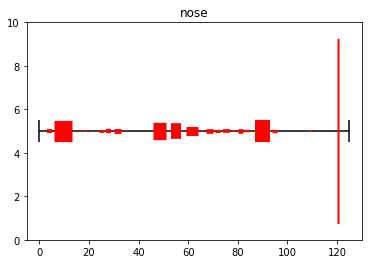

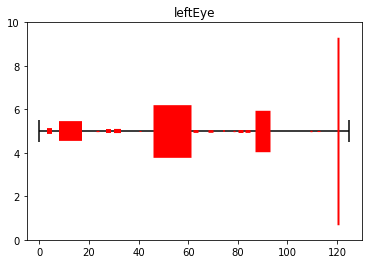

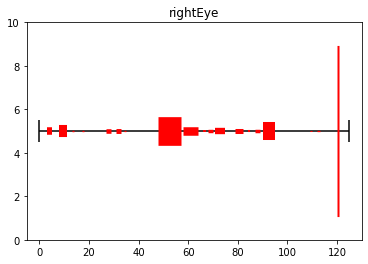

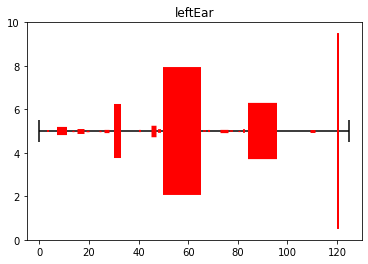

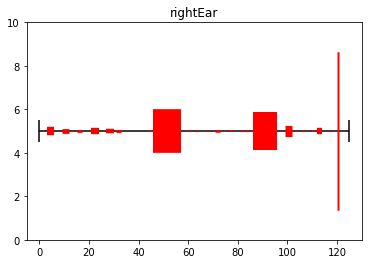

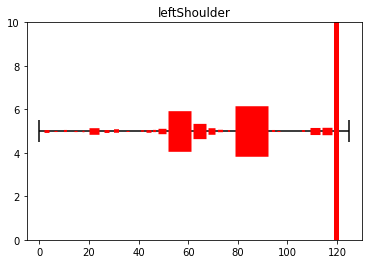

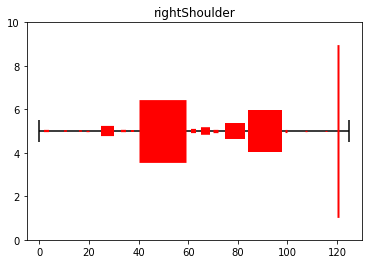

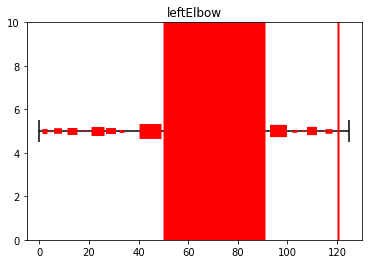

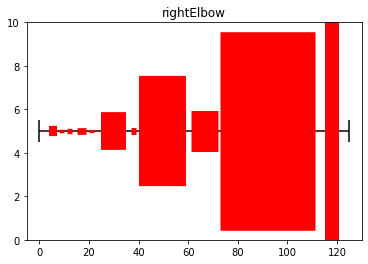

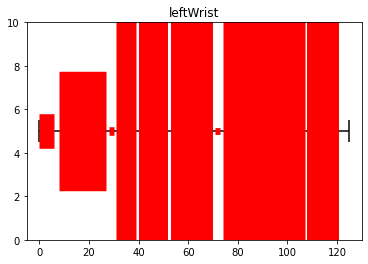

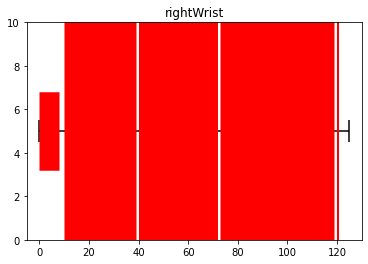

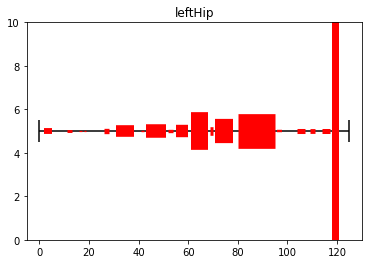

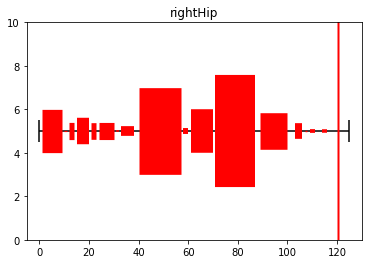

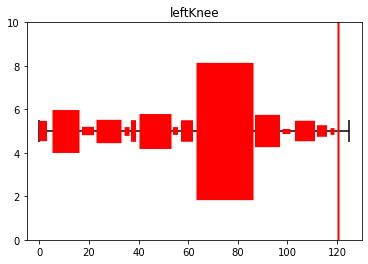

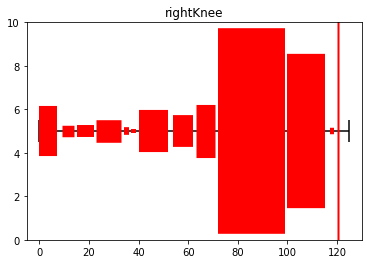

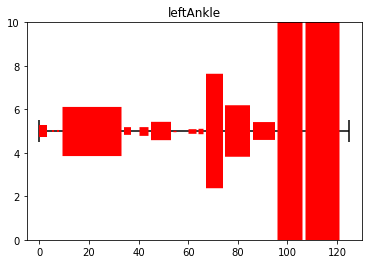

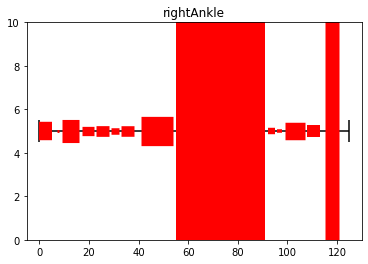

In [27]:
# set up the figure


for part, moves in motions.items():
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xlim(-5,130)
    ax.set_ylim(0,10)
    ax.set_title(part)
    # draw lines
    xmin = 0
    xmax = 125
    y = 5
    height = 1

    plt.hlines(y, xmin, xmax)
    plt.vlines(xmin, y - height / 2., y + height / 2.)
    plt.vlines(xmax, y - height / 2., y + height / 2.)
    for move in moves:
        plt.hlines(y, move[0], move[1], linewidth=move[2], color='red')
    plt.savefig(f'motion_graphs/{part}.png')